In [1]:
import pandas as pd

df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
1,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN
2,5YJSA1E24G,King,Seattle,WA,98103.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1N4AZ1CP5J,King,Shoreline,WA,98177.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10


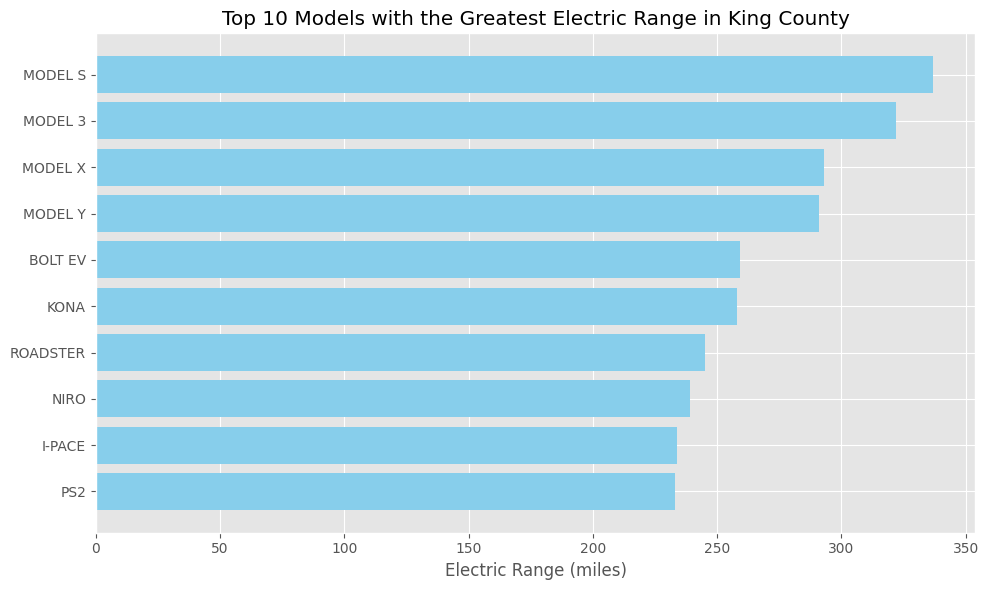

In [16]:
import matplotlib.pyplot as plt  #imports matplotlib library for plotting

#reads the CSV file into a pandas DataFrame
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")  #reads the CSV file into a DataFrame named 'df'

#filters data for records in King county
king_county = df[df['County'] == 'King']  #filters the DataFrame for records in King county

#groups the data by Model and find the maximum electric range for each model
max_range = king_county.groupby('Model')['Electric Range'].max().reset_index()  #groups data by 'Model' and find the maximum electric range for each

#sorts models by electric range in descending order
max_range= max_range.sort_values(by='Electric Range', ascending=False)  #sorts the models by electric range in descending order

#plotting
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))  #creates a figure with width 10 and height 6
plt.barh(max_range['Model'][:10], max_range['Electric Range'][:10], color='skyblue')  #creates a horizontal bar plot for the top 10 models with their electric range
plt.xlabel('Electric Range (miles)')  #labels the x-axis as 'Electric Range (miles)'
plt.title('Top 10 Models with the Greatest Electric Range in King County')  #sets the title for the plot
plt.gca().invert_yaxis()  #inverts y-axis to display the model with the highest range at the top
plt.tight_layout()  #adjusts layout to prevent clipping of labels
plt.show()  #displays the plot


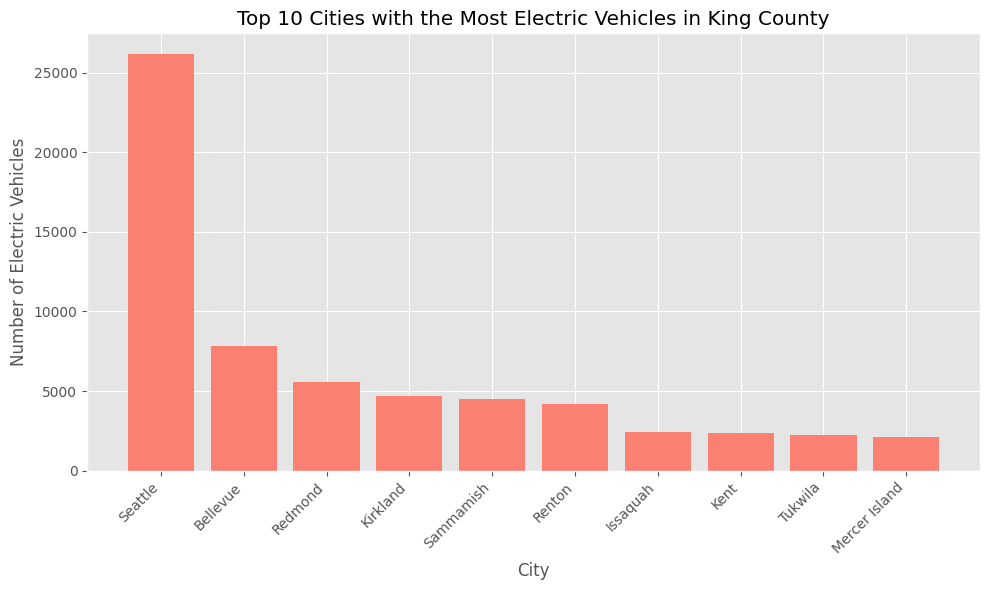

In [15]:


#groups data by city and count the number of electric vehicles in each city
city_pop= king_county['City'].value_counts().reset_index()
city_pop.columns = ['City', 'Electric Vehicles']

#sorts cities by the number of electric vehicles in descending order
city_population = city_pop.sort_values(by='Electric Vehicles', ascending=False)

#plotting
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))#creates a figure with a specific size
plt.bar(city_population['City'][:10], city_population['Electric Vehicles'][:10], color='salmon')#creates a bar plot for the top 10 cities
plt.xlabel('City')#labels for x-axis
plt.ylabel('Number of Electric Vehicles')#labels for y-axis
plt.title('Top 10 Cities with the Most Electric Vehicles in King County')#titles for the plot
plt.xticks(rotation=45, ha='right')#rotates x-axis labels for better readability
plt.tight_layout()#adjusts layout to prevent clipping of labels
plt.show()#display the plot
